# SEAGLIDER_GUAM_2019

This tutorial only works in a jupyter hosted at AWS US-WEST-2.

<img src="https://podaac.jpl.nasa.gov/Podaac/thumbnails/SEAGLIDER_GUAM_2019.png" alt="Drawing" style="width: 200px;"/>

* **User guide**: https://podaac-tools.jpl.nasa.gov/drive/files/misc/web/misc/seaglider_guam_2019/docs/Seaglider_data_Guam.pdf
* **DOI** [10.5067/ASROS-GLGU1](https://podaac-test.jpl.nasa.gov/dataset/SEAGLIDER_GUAM_2019)
* **Short Name**: SEAGLIDER_GUAM_2019
* **Description**
```
This dataset was produced by the Adaptive Sampling of Rain and Ocean Salinity from Autonomous Seagliders (NASA grant NNX17AK07G) project, an investigation to develop tools and strategies to better measure the structure and variability of upper-ocean salinity in rain-dominated environments. From October 2019 to January 2020, three Seagliders were deployed near Guam (14°N 144°E). The Seaglider is an autonomous profiler measuring salinity and temperature in the upper ocean. The three gliders sampled in an adaptive formation to capture the patchiness of the rain and the corresponding oceanic response in real time. The location was chosen because of the likelihood of intense tropical rain events and the availability of a NEXRAD (S-band) rain radar at the Guam Airport. Spacing between gliders varies from 1 to 60 km. Data samples are gridded by profile and on regular depth bins from 0 to 1000 m. The time interval between profiles was about 3 hours, and they are typically about 1.5 km apart. These profiles are available at Level 2 (basic gridding) and Level 3 (despiked and interpolated). All Seaglider data files are in netCDF format with standards compliant metadata. The project was led by a team from the Applied Physics Laboratory at the University of Washington.
```

* **Data Citation** (Please insert the following citations in your reference)
>1. Applied Physics Laboratory of the University of Washington. 2022. Adaptive Sampling of Rain and Ocean Salinity from Autonomous Seagliders (Guam 2019-2020). Ver. 1. PO.DAAC, CA, USA. Dataset accessed [YYYY-MM-DD] at https://doi.org/10.5067/ASROS-GLGU1

* **Data revision history** 

|Version | Release Date     | Data Provider |
|--------|----------|-------------------------|
|V1      |3/20/2022 | Luc Rainville |


* **Acknowledgement**

## Content

### Specify parameters
The following parameters are used for this particular dataset. 

In [1]:
#Short_name is used to identify a specific dataset in NASA Earthdata. 
short_name='SEAGLIDER_GUAM_2019'

## Direct S3 access

Use EarthData Login (EDL) to get a direct S3 access. Direct S3 access is only available to users running in AWS, us-west-2 region. All other access must come from HTTP requests for PO.DAAC data.

Create an EDL following this [link](https://earthdata.nasa.gov/eosdis/science-system-description/eosdis-components/earthdata-login).

Create a .netrc file in the home folder following [these instructions](https://urs.earthdata.nasa.gov/documentation/for_users/data_access/curl_and_wget).

**.netrc** is essential to enable the following blocks. 

In [69]:
def init_S3FileSystem():
    import requests,s3fs
    s3_cred_endpoint = {
        'podaac':'https://archive.podaac.earthdata.nasa.gov/s3credentials',
        'lpdaac':'https://data.lpdaac.earthdatacloud.nasa.gov/s3credentials'}

    temp_creds_url = s3_cred_endpoint['podaac']
    creds = requests.get(temp_creds_url).json()
    s3 = s3fs.S3FileSystem(anon=False,
                           key=creds['accessKeyId'],
                           secret=creds['secretAccessKey'], 
                           token=creds['sessionToken'])
    return s3

import xarray as xr
import pprint
import pylab as plt
import numpy as np
from glob import glob
from pprint import pprint
s3sys=init_S3FileSystem()

## Explore the collections

In [7]:
#s3://podaac-ops-cumulus-protected is the PODAAC S3 bucket. 
#s3://podaac-ops-cumulus-protected/{short_name} is the path to this dataset. 

#This dataset is organized by year.

fns=s3sys.glob("s3://podaac-ops-cumulus-protected/%s/*nc"%short_name)
pprint.pprint(fns)

['podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg178_Oct2019_data_L2.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg178_Oct2019_data_L3.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg179_Guam_19_level2.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg179_Guam_19_level3.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg180_Guam_19_level2.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg180_Guam_19_level3.nc']


In [67]:
fns=s3sys.glob("s3://podaac-ops-cumulus-protected/%s/*3.nc"%short_name)
pprint(fns)

for fn in fns:
    s3sys.download(fn,'./')

['podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg178_Oct2019_data_L3.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg179_Guam_19_level3.nc',
 'podaac-ops-cumulus-protected/SEAGLIDER_GUAM_2019/sg180_Guam_19_level3.nc']


## Plot T/S from the three gliders

<xarray.Dataset>
Dimensions:             (z_data_point: 1001, half_profile_data_point: 892,
                         dive_data_point: 446)
Dimensions without coordinates: z_data_point, half_profile_data_point,
                                dive_data_point
Data variables: (12/29)
    z                   (z_data_point) float32 0.0 1.0 2.0 ... 998.0 999.0 1e+03
    time                (half_profile_data_point, z_data_point) datetime64[ns] ...
    S                   (half_profile_data_point, z_data_point) float32 nan ....
    T                   (half_profile_data_point, z_data_point) float32 29.71...
    speed               (half_profile_data_point, z_data_point) float32 ...
    lat                 (half_profile_data_point, z_data_point) float32 ...
    ...                  ...
    u_dive              (dive_data_point) float32 ...
    v_dive              (dive_data_point) float32 ...
    surface_curr_east   (dive_data_point) float32 ...
    surface_curr_north  (dive_data_point) float32

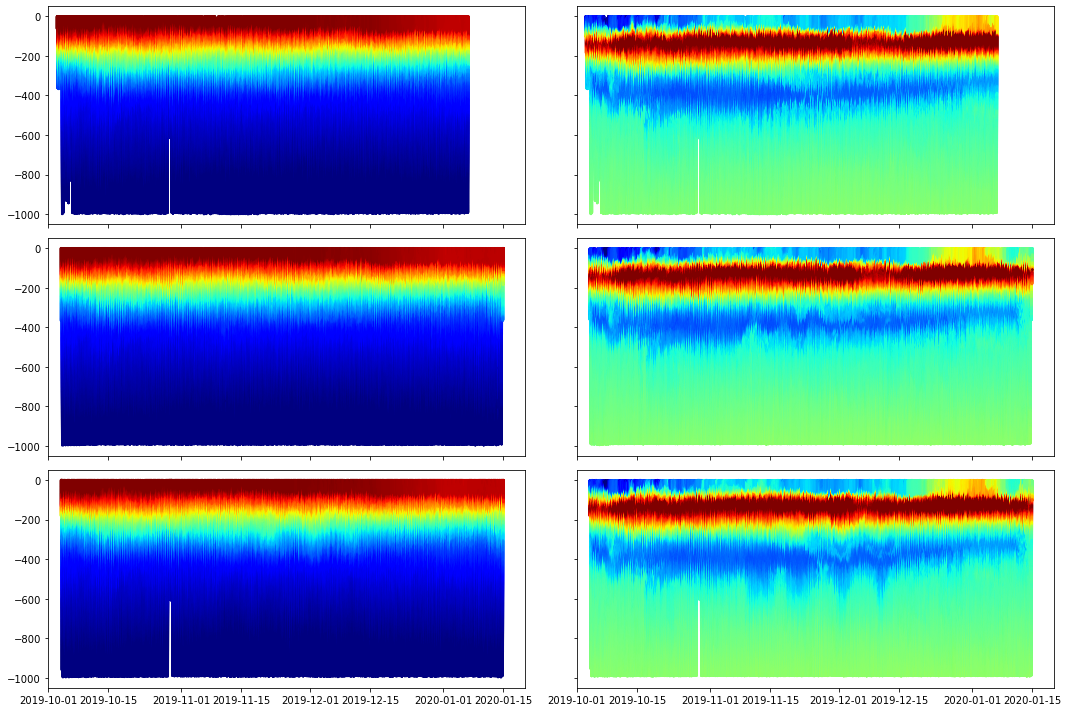

In [71]:
fig,ax=plt.subplots(3,2,figsize=(15,10),sharex=True,sharey=True)
fns=sorted(glob('*3.nc'))

for i in range(3):
    fn=fns[i]
    d=xr.open_dataset(fn)
    tt=d['time'].data
    zz=d['z'].data
    ax[i,0].scatter(tt,-np.ones(tt.shape)*zz.reshape(-1,zz.size),s=2,c=d['T'],vmin=5,vmax=29,cmap=plt.cm.jet) 
    ax[i,1].scatter(tt,-np.ones(tt.shape)*zz.reshape(-1,zz.size),s=2,c=d['S'],vmin=34,vmax=35,cmap=plt.cm.jet) 

ax[-1,0].set_xlim(np.datetime64('2019-10-01'),np.datetime64('2020-01-20'))
ax[-1,1].set_xlim(np.datetime64('2019-10-01'),np.datetime64('2020-01-20'))
plt.tight_layout()
print(d)

# Plot the dive locations

Text(0, 0.5, 'Latitude')

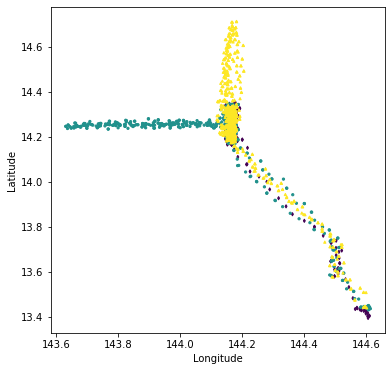

In [83]:
fig,ax=plt.subplots(1,1,figsize=(6,6))

ss=['d','o','^']
for i in range(3):
    fn=fns[i]
    d=xr.open_dataset(fn)
    lon=d['lon'].data[:,0]
    lat=d['lat'].data[:,0]
    tt=d['time'].data[:,0]
    ax.scatter(lon,lat,c=i*np.ones_like(lon),s=5,marker=ss[i],vmin=0,vmax=2) 
plt.xlabel('Longitude')
plt.ylabel('Latitude')